<table
            <div align="left">
                <font color="#2D00CF" size=6.0px>
                    <b>DIABETES PREDICTIONS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


# PROBLEM STATEMENT 

<div class="alert alert-block alert-success">
<b>predicting the diabetes based on numerous features to control the disease earlier. If diabetic patient is untreated for a long time, it may lead to increase in blood sugar levels. Below analysis is to predict diabetes according to the suitable features which will be discovered using several machine learning algorihms:<b>

## DATA DIRECTORY

**Gender:** Sex of the patients.

**Age:** Age of the patients.

**Hypertension:** This feature indicates patients who have high blood pressure.
1= patients with HBP
0= patients with no HBP

**heart_disease:** 1= patients with heart disease
0= not suffering with heart disease

**smoking_history:** Whether the person smokes or not.

    never      = never smoked before.
    no info    = no feed back from the patient.
    current    = smoking at present.
    not current= might have smoked before but not anymore.
    former     = might have smoke in past.
    ever       = never smoked before.

**BMI:** Body mass index (BMI), measures the body fat based on height and weight.

**HbA1c_level** HbA1c is your average blood glucose (sugar) levels for the last two to three months.

**blood_glucose_level** Indicated the blood glucose level, helps in identifying prediabetes.

**diabetes** 0= no diabetes.
1= has diabetes.

## Table of Contents

1. **[Importing the required liberies and reading the data](#import_lib)**

2. **[Shape of the data](#shape)**

3. **[Checking for the null values](#null_values)**

4. **[Data types](#data_types)**

5. **[Duplicated value](#duplicate)**

6. **[Analysing the categorical data](#analysis)**

7. **[Label encoding](#le)**

8. **[Checking Sparsity](#sparsity)**

9. **[Ouliers](#outliers)**

10. **[Skewness](#skew)**

11. **[Multicollinearity](#heatmaap)**

12. **[Class imbalance](#ci)**

13. **[Model building](#mb)**
     - 13.1 - [Without scaling](#wos)
          - 13.1.1 - [Logistic regression](#lr)
          - 13.1.2 - [Decision tree](#dt)
          - 13.1.3 - [Random Forest](#rf)
          - 13.1.4 - [K Nearest Neighbor](#knn)
     - 13.2 - [With scaling](#ws)
          - 13.2.1 - [Logistic regression](#lre)
          - 13.2.2- [Decision tree](#dtr)
          - 13.2.3- [Random Forest](#rfo)
          - 13.2.4- [K Nearest Neighbor](#knne)


<a id='import_lib'></a>
### 1.Importing the required liberies and reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

df=pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


 *This is a classification dataset and the target in this is diabetes.*

<a id='shape'></a>
### 2.Shape of the data

In [2]:
df.shape

(100000, 9)

<div class="alert alert-block alert-info">
<b>Talks about the dimension of the dataset, this has 100000 rows and 9 columns
    <b>

### 3.Checking for the null values.
<a id='null_values'></a>

In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<div class="alert alert-block alert-info">
<b>There are no null values.<b>

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<div class="alert alert-block alert-info">
<b>This gives the descriptive view about every numerical column.
From the above data we can obsever minimum value for age is 0.08 which is unusual, there can be a data error or either a chance of collecting data of infants.<b>

In [5]:
df[(df["age"]<1)].shape

(911, 9)

<div class="alert alert-block alert-info">
<b>There are 911 data about infants so that means there is no error but collection of infants data.<b>

In [6]:
df[(df["age"]<1) & (df["diabetes"]==0)].shape

(911, 9)

<div class="alert alert-block alert-info">
<b>But as there are no rare cases these can be dropped from the file<b>

In [7]:
to_drop=df[(df["age"]<1)].index
to_drop

Int64Index([  155,   218,   241,   268,   396,   480,   577,   578,   677,
              792,
            ...
            98990, 99001, 99337, 99410, 99427, 99452, 99536, 99629, 99778,
            99911],
           dtype='int64', length=911)

In [8]:
df.drop(to_drop,inplace=True)

<div class="alert alert-block alert-info">
<b>We dropped the values here.<b>

In [9]:
df.shape

(99089, 9)

### 4.Data types
<a id='data_types'></a>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99089 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99089 non-null  object 
 1   age                  99089 non-null  float64
 2   hypertension         99089 non-null  int64  
 3   heart_disease        99089 non-null  int64  
 4   smoking_history      99089 non-null  object 
 5   bmi                  99089 non-null  float64
 6   HbA1c_level          99089 non-null  float64
 7   blood_glucose_level  99089 non-null  int64  
 8   diabetes             99089 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


<div class="alert alert-block alert-info">
<b>All the data types are in the required format, therfore no convertion is required<b>

### 5.Duplicated value
<a id='duplicate'></a>

In [11]:
df.duplicated().sum()

3853

<div class="alert alert-block alert-info">
<b>There are duplicate values, but need not to be handled as u can see the data is qualitative.<b>

### 6.Analysing the categorical data
<a id='analysis'></a>

In [12]:
df["smoking_history"].value_counts()

never          35058
No Info        34952
former          9352
current         9285
not current     6438
ever            4004
Name: smoking_history, dtype: int64

<Axes: xlabel='smoking_history', ylabel='count'>

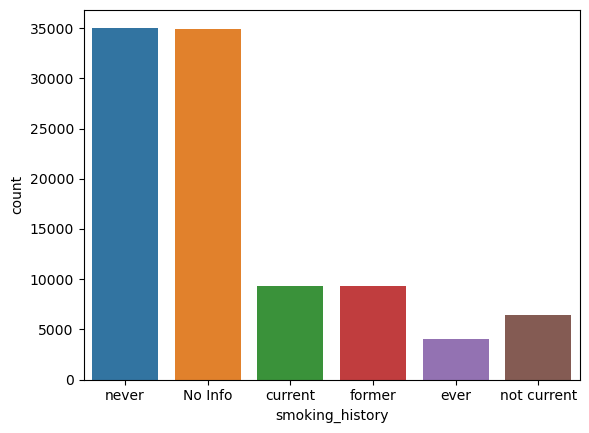

In [13]:
sns.countplot(x=df["smoking_history"])

<div class="alert alert-block alert-info">
<b>From the above data we can observe there are similar labels which can be reduced.<b>

In [14]:
df["smoking_history"].replace("not current", "former", inplace=True)

In [15]:
df["smoking_history"].replace("ever", "never", inplace=True)

In [16]:
df["smoking_history"].value_counts()

never      39062
No Info    34952
former     15790
current     9285
Name: smoking_history, dtype: int64

<div class="alert alert-block alert-info">
<b>Reducing the labels helps us to reduce multicollinearity.<b>

In [17]:
df["gender"].value_counts()

Female    58119
Male      40952
Other        18
Name: gender, dtype: int64

### 7.Label encoding
<a id='le'></a>

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['la_smoking_history']=le.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,la_smoking_history
0,Female,80.0,0,1,never,25.19,6.6,140,0,3
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,3
3,Female,36.0,0,0,current,23.45,5.0,155,0,1
4,Male,76.0,1,1,current,20.14,4.8,155,0,1


<div class="alert alert-block alert-info">
<b>We are converting categorical data into numeric data, because for any statistical analysis the system only accepts numerical values<b>

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['la_gender']=le.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,la_smoking_history,la_gender
0,Female,80.0,0,1,never,25.19,6.6,140,0,3,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,3,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1


In [20]:
df["la_smoking_history"].value_counts()

3    39062
0    34952
2    15790
1     9285
Name: la_smoking_history, dtype: int64

### 8.Checking Sparsity 
<a id='sparsity'></a>

In [21]:
df_copy=df
zero=(df_copy==0).mean()*100
overall=(df_copy.isnull().sum().sum())+((df_copy==0).sum().sum())/df_copy.size*100
print("\nzero percentage", zero)
print("\noverall percentage", overall)


zero percentage gender                  0.000000
age                     0.000000
hypertension           92.446185
heart_disease          96.021758
smoking_history         0.000000
bmi                     0.000000
HbA1c_level             0.000000
blood_glucose_level     0.000000
diabetes               91.421853
la_smoking_history     35.273340
la_gender              58.653332
dtype: float64

overall percentage 33.98331527488144


<div class="alert alert-block alert-info">
<b>The percentage seen in this can be just neglected because they are dummy variables for the categorical data.<b>

### 9.Outliers 
<a id='outliers'></a>

*Outliers need to be handled as they can skew the results of data analysis and hamper model performance*

<Axes: xlabel='age'>

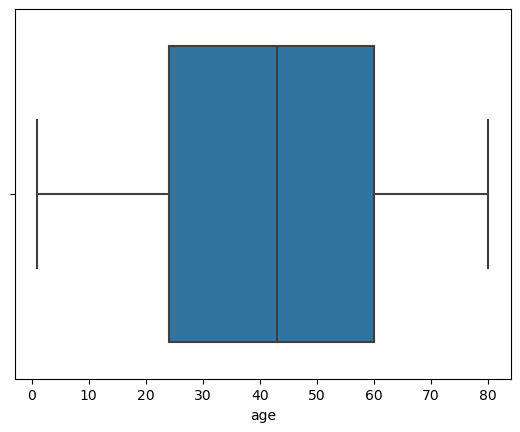

In [22]:
sns.boxplot(x=df["age"])

<div class="alert alert-block alert-info">
<b>There are no outliers for the age column.<b>

<Axes: xlabel='bmi'>

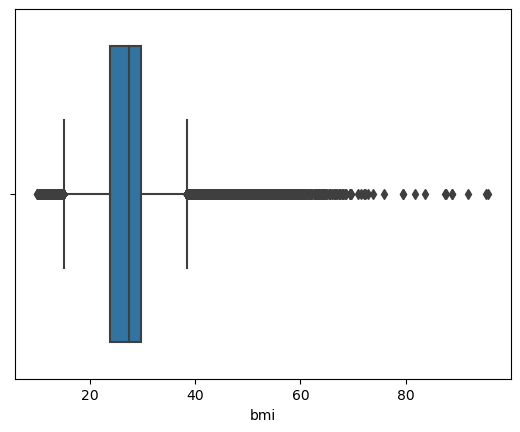

In [23]:
sns.boxplot(x=df["bmi"])

<div class="alert alert-block alert-info">
<b>This shows BMI has outliers which need to be handled<b>

In [24]:
#method to find the limits of outliers: IQR
def boundaries(df,var):
    q1=df[var].quantile(.25)
    q3=df[var].quantile(.75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    return lb,ub

In [25]:
lb,ub=boundaries(df,"bmi")
print("lower limit:" ,lb)
print("upper limit:", ub)

#here we are printing the limits.

lower limit: 14.964999999999998
upper limit: 38.445


In [26]:
x=df[(df["bmi"]<lb) | (df["bmi"]> ub)]
x.shape

#checking the count of the outliers.

(7214, 11)

In [27]:
out_per=(7214/100000) *100
out_per

#percentage of outliers.

7.2139999999999995

In [28]:
df["bmi"]=np.where(df["bmi"]>ub,ub,
                   np.where(df["bmi"]<lb,lb,df["bmi"]))

#handling the outliers by capping.

<Axes: xlabel='HbA1c_level'>

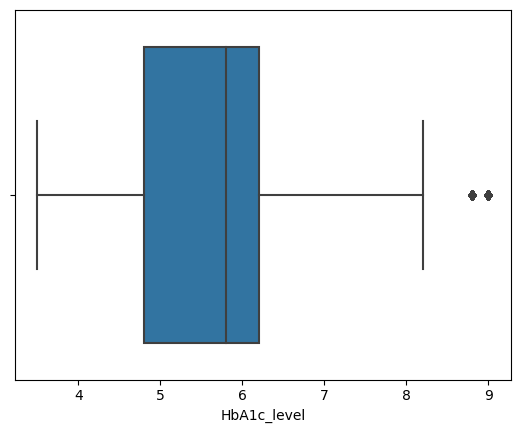

In [29]:
sns.boxplot(x=df["HbA1c_level"])

In [30]:
lb,ub=boundaries(df,"HbA1c_level")
print("lower limit:" ,lb)
print("upper limit:", ub)

lower limit: 2.6999999999999993
upper limit: 8.3


In [31]:
x1=df[(df["HbA1c_level"]<lb) | (df["HbA1c_level"]> ub)]
x1.shape

(1315, 11)

In [32]:
df["HbA1c_level"]=np.where(df["HbA1c_level"]>ub,ub,
                   np.where(df["HbA1c_level"]<lb,lb,df["HbA1c_level"]))

<Axes: xlabel='blood_glucose_level'>

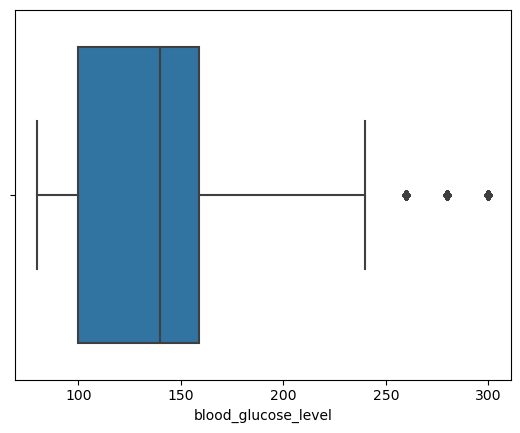

In [33]:
sns.boxplot(x=df["blood_glucose_level"])

In [34]:
lb,ub=boundaries(df,"blood_glucose_level")
print("lower limit:" ,lb)
print("upper limit:", ub)

lower limit: 11.5
upper limit: 247.5


In [35]:
x2=df[(df["blood_glucose_level"]<lb) | (df["blood_glucose_level"]>ub)]
x2.shape

(2038, 11)

In [36]:
df["blood_glucose_level"]=np.where(df["blood_glucose_level"]>ub,ub,
                                  np.where(df["blood_glucose_level"]<lb,lb,df["blood_glucose_level"]))

### 10.Skewness
<a id='skew'></a>

C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_19512\3941461054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], hist=True)


-0.04656006948729209

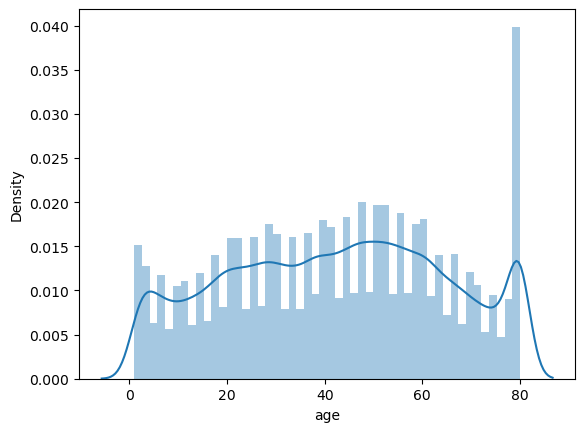

In [37]:
sns.distplot(df["age"], hist=True)
df["age"].skew()

<div class="alert alert-block alert-info">
<b>The skewness of age is -0.046, which is nearly zero skewed(normally distributed).<b>

In [38]:
df_mean=df["age"].mean()
df_median=df["age"].median()
df_mode=df["age"].mode()
print("mean:", df_mean)
print("median:", df_median)
print("mode:", df_mode[0])

mean: 42.2660929063771
median: 43.0
mode: 80.0


C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_19512\1295679863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], hist=True)


0.11422234316329896

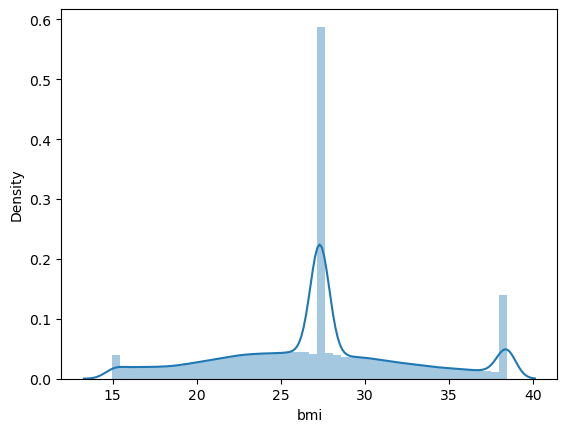

In [39]:
sns.distplot(df["bmi"], hist=True)
df["bmi"].skew()

<div class="alert alert-block alert-info">
<b>The skewness for bmi is 0.11, which is nearly zero skewed(normally distributed).<b>

C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_19512\3723673905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["blood_glucose_level"],hist=True)


0.42500465291347556

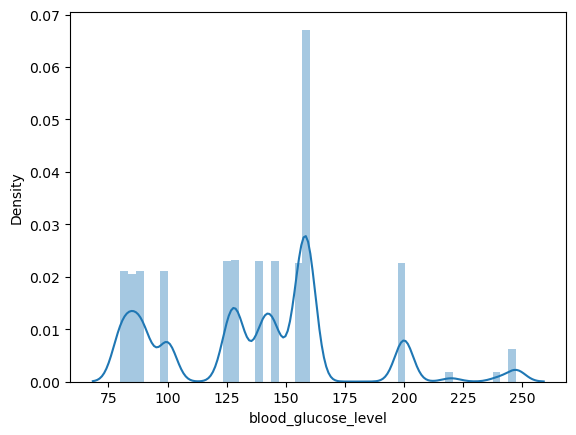

In [40]:
sns.distplot(df["blood_glucose_level"],hist=True)
df["blood_glucose_level"].skew()

<div class="alert alert-block alert-info">
<b>The skewness for blood glucose level is a bit high so we handle it for the data to be normally distributed so the data wont be biased.<b>

In [41]:
sk=np.cbrt(df["blood_glucose_level"])
sk.skew()

-0.041649932982052794

### 11.Multicollinearity
<a id='heatmap'></a>

In [42]:
df1=df[["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level","diabetes","la_smoking_history","la_gender"]]

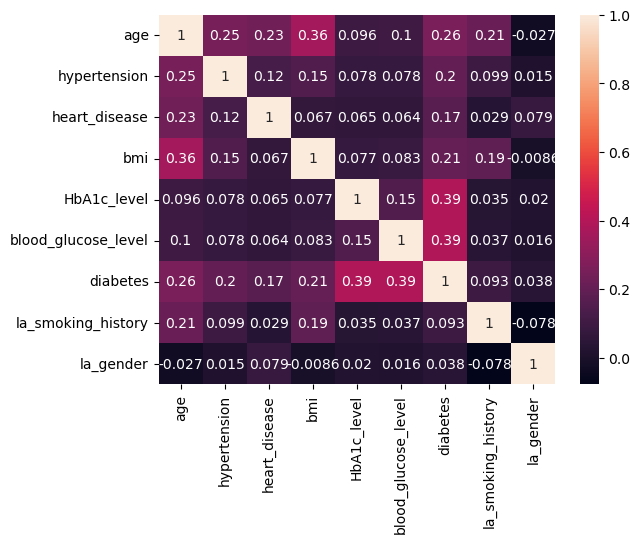

In [43]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>The collinearity of every feature is very less, so that mean no column is dependent on the other.<b>

In [44]:
#checking the labels present in each column 
for col in df:
    print(col, ':', len(df[col].unique()),"labels")

gender : 3 labels
age : 91 labels
hypertension : 2 labels
heart_disease : 2 labels
smoking_history : 4 labels
bmi : 2350 labels
HbA1c_level : 17 labels
blood_glucose_level : 16 labels
diabetes : 2 labels
la_smoking_history : 4 labels
la_gender : 3 labels


### 12.Class imbalance
<a id='ci'></a>

<Axes: xlabel='diabetes', ylabel='count'>

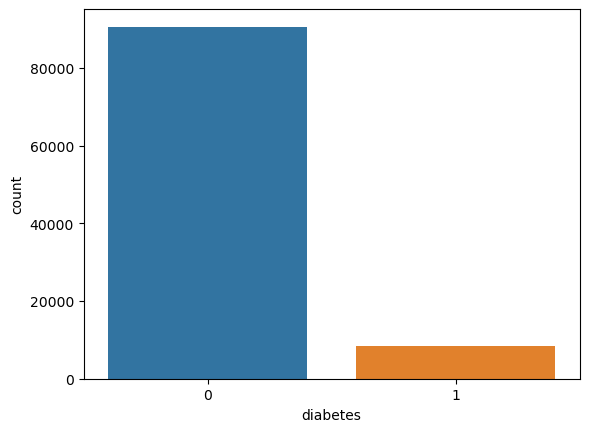

In [45]:
sns.countplot(x=df["diabetes"])

<div class="alert alert-block alert-info">
<b>There is a imbalance in diabetes column which may create a biased prediction if not handled.<b>

In [46]:
x=df[["age","hypertension","heart_disease","la_smoking_history","bmi","HbA1c_level","blood_glucose_level","la_gender"]]
y=df["diabetes"]

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote= SMOTE()
smote_x,smote_y= smote.fit_resample(x,y)

In [48]:
print("Before sampling class distribution-", Counter(y))
f=Counter(smote_y)
print("After sampling class distribution-", Counter(smote_y))

Before sampling class distribution- Counter({0: 90589, 1: 8500})
After sampling class distribution- Counter({0: 90589, 1: 90589})


<div class="alert alert-block alert-info">
<b>Using smote we are over-sampling the data, here i used over sampling instead of other methods to not lose valuable data by under sampling.<b>

<Axes: title={'center': 'Class distribution after applying SMOTE'}, xlabel='diabetes'>

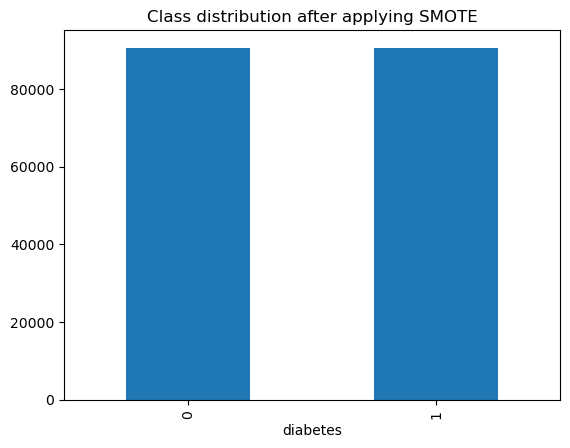

In [49]:
pd.Series(smote_y).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='diabetes')

<a id='mb'></a>
# 13. Model Building

<a id='wos'></a>
## 13.1 Without scaling

### Spliting the data

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(smote_x,smote_y,test_size=0.2)
print("The shape of X_train is:",x_train.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (144942, 8)
The shape of y_train is: (144942,)
The shape of X_test is: (36236, 8)
The shape of y_test is: (36236,)


<div class="alert alert-block alert-info">
<b>Spliting the data into train and test model to estimate the performance.
(test_size indicates the percentage we want to divide.)<b>

### 13.1.1. Logistic regression
<a id='lr'></a>

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\SOUMYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred=lr.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     18028
           1       0.88      0.89      0.89     18208

    accuracy                           0.88     36236
   macro avg       0.88      0.88      0.88     36236
weighted avg       0.88      0.88      0.88     36236



In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[15858  2170]
 [ 2022 16186]]


<a id='dt'></a>
### 13.1.2. Decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred=dt.predict(x_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18028
           1       0.97      0.97      0.97     18208

    accuracy                           0.97     36236
   macro avg       0.97      0.97      0.97     36236
weighted avg       0.97      0.97      0.97     36236



In [58]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[17461   567]
 [  480 17728]]


<a id='rf'></a>
### 13.1.3. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = rf.predict(x_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18028
           1       0.97      0.97      0.97     18208

    accuracy                           0.97     36236
   macro avg       0.97      0.97      0.97     36236
weighted avg       0.97      0.97      0.97     36236



In [62]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[17552   476]
 [  456 17752]]


<a id='knn'></a>
### 13.1.4. K Nearest Neighbor

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred = knn.predict(x_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     18028
           1       0.92      0.98      0.95     18208

    accuracy                           0.95     36236
   macro avg       0.95      0.94      0.94     36236
weighted avg       0.95      0.95      0.94     36236



In [66]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16384  1644]
 [  347 17861]]


<a id='ws'></a>
## 13.2.With Scaling

In [67]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df[["age","HbA1c_level","bmi","blood_glucose_level"]]=scaler.fit_transform(df[["age","HbA1c_level","bmi","blood_glucose_level"]])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,la_smoking_history,la_gender
0,Female,1.000000,0,1,never,0.435477,0.645833,0.358209,0,3,0
1,Female,0.670886,0,0,No Info,0.526193,0.645833,0.000000,0,0,0
2,Male,0.341772,0,0,never,0.526193,0.458333,0.465672,0,3,1
3,Female,0.443038,0,0,current,0.361371,0.312500,0.447761,0,1,0
4,Male,0.949367,1,1,current,0.220400,0.270833,0.447761,0,1,1


In [68]:
x=df[["age","hypertension","heart_disease","la_smoking_history","bmi","HbA1c_level","blood_glucose_level","la_gender"]]
y=df["diabetes"]

In [69]:
x.head()

,age,hypertension,heart_disease,la_smoking_history,bmi,HbA1c_level,blood_glucose_level,la_gender
0,1.000000,0,1,3,0.435477,0.645833,0.358209,0
1,0.670886,0,0,0,0.526193,0.645833,0.000000,0
2,0.341772,0,0,3,0.526193,0.458333,0.465672,1
3,0.443038,0,0,1,0.361371,0.312500,0.447761,0
4,0.949367,1,1,1,0.220400,0.270833,0.447761,1


In [70]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote= SMOTE()
smote_x,smote_y= smote.fit_resample(x,y)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(smote_x,smote_y,test_size=0.2)
print("The shape of X_train is:",x_train.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (144942, 8)
The shape of y_train is: (144942,)
The shape of X_test is: (36236, 8)
The shape of y_test is: (36236,)


<a id='lre'></a>
### 13.2.1. logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18040
           1       0.89      0.88      0.89     18196

    accuracy                           0.89     36236
   macro avg       0.89      0.89      0.89     36236
weighted avg       0.89      0.89      0.89     36236



In [74]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16051  1989]
 [ 2124 16072]]


<a id='dtr'></a>
### 13.2.2. Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18040
           1       0.97      0.97      0.97     18196

    accuracy                           0.97     36236
   macro avg       0.97      0.97      0.97     36236
weighted avg       0.97      0.97      0.97     36236



In [77]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[17413   627]
 [  581 17615]]


<a id='rfo'></a>
### 13.2.3.Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [79]:
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18040
           1       0.98      0.98      0.98     18196

    accuracy                           0.98     36236
   macro avg       0.98      0.98      0.98     36236
weighted avg       0.98      0.98      0.98     36236



In [80]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[17675   365]
 [  424 17772]]


<a id='knne'></a>
### 13.2.4. K Nearest Neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     18040
           1       0.93      0.98      0.96     18196

    accuracy                           0.96     36236
   macro avg       0.96      0.96      0.96     36236
weighted avg       0.96      0.96      0.96     36236



In [83]:
cm = confusion_matrix(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16789  1251]
 [  357 17839]]
